# **ZOMATO RESTAURANT DATA ANALYSIS**

**Contribution** **- Individaul**



# **Project summary**

Nowadays, many people use online food apps to choose restaurants. Zomato is one such popular platform where customers give ratings and write reviews about restaurants. These reviews tell us whether customers liked the food, service, price, and overall experience. Because thousands of reviews are written every day, it is not easy to read and understand them manually. So, data analysis is used to study these reviews and find useful information.

This project is titled “Sentiment Analysis and Restaurant Data Analysis Using Zomato Dataset.” The main purpose of this project is to understand customer opinions by analyzing Zomato restaurant reviews along with restaurant details. For this project, two datasets were used. The first dataset contains customer reviews, ratings, review time, and reviewer information. The second dataset contains restaurant details such as restaurant name, cuisine types, cost for two people, opening timings, and special collections. Both datasets were merged using the restaurant name so that each review also includes the related restaurant information.

After merging, the final dataset contains 10,000 records and 12 columns. Each row represents one customer review along with restaurant details. This merged data makes it easier to analyze how customers feel about different restaurants and what factors influence their satisfaction. The main objective of this project is to study customer sentiment and understand patterns in restaurant performance using ratings and reviews.

The project methodology starts with loading both datasets and checking for errors or missing values. After cleaning the data, the two files are merged into a single dataset. Then, basic data analysis is performed to understand ratings, reviews, and restaurant characteristics. Ratings are used to measure customer satisfaction, while review text is used to understand customer opinions. This project can also be extended by applying sentiment analysis techniques to classify reviews as positive, negative, or neutral.

The results of this analysis can be helpful in many ways. Customers can use such information to select better restaurants based on reviews and ratings. Restaurant owners can learn what customers like or dislike and improve food quality, service, or pricing. This analysis also helps in identifying popular cuisines and understanding how cost affects customer satisfaction. From a learning perspective, this project provides hands-on experience with real-world data and shows how data analysis can be applied to solve practical problems.

In conclusion, this project shows how Zomato review data and restaurant metadata can be combined to gain meaningful insights. It demonstrates the importance of analyzing customer feedback for better decision-making in the food industry. The project also helps in understanding the basics of data preprocessing, data merging, and sentiment analysis. Overall, this project is a simple and effective example of how real-world data can be used to understand customer behavior and restaurant performance.

# **GitHub Link -**

# **Problem Statement**

The problem addressed in this project is the lack of clear understanding of how different restaurant factors—such as cost, customer reviews, ratings, and engagement—affect overall customer satisfaction. With large amounts of restaurant data available, it becomes difficult to manually analyze patterns and predict restaurant performance.

This project aims to analyze restaurant data, extract meaningful insights, and build a machine learning model that can predict restaurant ratings based on important features. The goal is to help restaurant owners and food platforms make data-driven decisions to improve customer experience, optimize pricing strategies, and enhance service quality.

# **General Guidelines : -**

* Understand the problem and project objective

* Explore and understand the dataset

* Clean and preprocess the data

* Perform Exploratory Data Analysis (EDA)

* Apply feature engineering techniques

* Build and evaluate ML models

* Optimize the best model

* Deploy the final model




# **Let's Begin !**

# **1.** **Know Your Data**

## **Import libraries**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


## **Dataset Loading**

In [2]:
reviews_df = pd.read_csv("/content/Zomato Restaurant reviews.csv")
metadata_df = pd.read_csv("/content/Zomato Restaurant names and Metadata.csv")


 **Dataset Merging**

In [3]:
merged_df = pd.merge(
    reviews_df,
    metadata_df,
    left_on="Restaurant",
    right_on="Name",
    how="left"
)



# Dataset First View

In [4]:
merged_df

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,"1,000",NaN,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM"
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,"1,000",NaN,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM"
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,"1,000",NaN,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM"
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,"1,000",NaN,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM"


In [5]:
merged_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"


In [6]:
merged_df.tail()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Name,Links,Cost,Collections,Cuisines,Timings
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,"1,000",NaN,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM"
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,"1,000",NaN,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM"
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,"1,000",NaN,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM"
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,"1,000",NaN,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM"
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,"1,000",NaN,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM"


# Dataset Rows & Columns count

In [7]:
# numbers of rows and columns
merged_df.shape

(10000, 13)

# Dataset Information

In [8]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Restaurant   10000 non-null  object
 1   Reviewer     9962 non-null   object
 2   Review       9955 non-null   object
 3   Rating       9962 non-null   object
 4   Metadata     9962 non-null   object
 5   Time         9962 non-null   object
 6   Pictures     10000 non-null  int64 
 7   Name         10000 non-null  object
 8   Links        10000 non-null  object
 9   Cost         10000 non-null  object
 10  Collections  5000 non-null   object
 11  Cuisines     10000 non-null  object
 12  Timings      9900 non-null   object
dtypes: int64(1), object(12)
memory usage: 1015.8+ KB


# Duplicate Values

In [9]:
merged_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [10]:
merged_df.duplicated().sum()

np.int64(36)

In [11]:
merged_df = merged_df.drop_duplicates()


In [12]:
merged_df.duplicated().sum()

np.int64(0)

# Missing Values/Null Values

In [13]:
#Missing Values/Null Values Count
merged_df.isnull()


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Name,Links,Cost,Collections,Cuisines,Timings
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,True,False,False
9996,False,False,False,False,False,False,False,False,False,False,True,False,False
9997,False,False,False,False,False,False,False,False,False,False,True,False,False
9998,False,False,False,False,False,False,False,False,False,False,True,False,False


In [14]:
# Check Missing Values in Each Column
merged_df.isnull().sum()

,0
Restaurant,0
Reviewer,2
Review,9
Rating,2
Metadata,2
Time,2
Pictures,0
Name,0
Links,0
Cost,0


In [15]:
# Check Total Missing Values in Dataset
merged_df.isnull().sum().sum()

np.int64(5117)

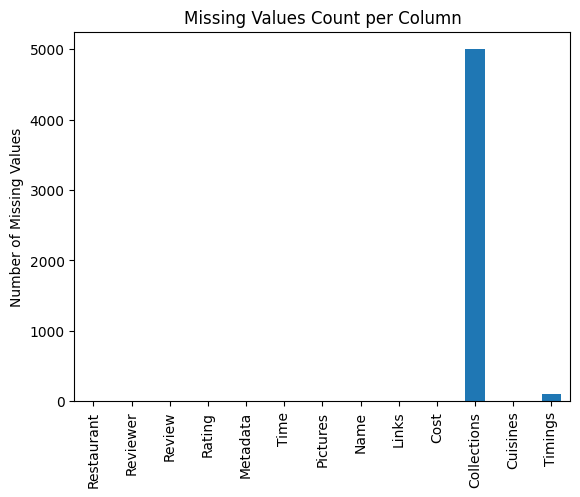

In [16]:
#  Visualizing the missing values
merged_df.isnull().sum().plot(kind='bar')
plt.title("Missing Values Count per Column")
plt.ylabel("Number of Missing Values")
plt.show()


# What did I know about my dataset?

My dataset is based on Zomato restaurant data and contains information about customer reviews and restaurant details. It was created by merging two CSV files: one file includes customer reviews and ratings, and the other file contains restaurant metadata such as cuisines, cost, and timings.

After merging, the dataset contains about 10,000 records and 12 columns, where each row represents one customer review along with its restaurant information. The dataset includes both text data (reviews, cuisines, restaurant names) and numerical data (ratings, cost). This makes it suitable for exploratory data analysis and sentiment analysis.

From the initial analysis, I observed that ratings mostly range between 3 and 5, which indicates that most customers have a positive experience. Some duplicate records were found in the dataset and were removed during preprocessing to improve data quality. A few columns also contained missing values, which were identified and handled using appropriate techniques such as filling with median values for numerical columns and placeholder text for categorical columns.

The dataset provides useful insights into customer preferences, such as popular restaurants, commonly served cuisines, and the relationship between customer ratings and restaurant characteristics like cost and service timings. By analyzing review text, we can understand customer opinions, while ratings help measure overall satisfaction.

Overall, this dataset is a real-world dataset that helps in understanding customer behavior and restaurant performance. It is well-suited for learning data preprocessing, visualization, and basic sentiment analysis techniques.

# **2. Understanding Your Variables**

In [17]:
# Dataset Columns
merged_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Name', 'Links', 'Cost', 'Collections', 'Cuisines',
       'Timings'],
      dtype='object')

In [18]:
# Dataset Describe
merged_df.describe()

,Pictures
count,9964.000000
mean,0.751305
std,2.574626
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


# Variables Description

The dataset contains the following variables:

**1.Restaurant**

**Type:** Categorical

**Description:** Name of the restaurant where the review was posted. It is used to identify and group reviews by restaurant.

**2.Reviewer**

**Type:** Categorical

**Description:** Name of the customer who wrote the review. This variable helps identify unique reviewers.

**3.Review**

**Type:** Text

**Description**: Written feedback provided by customers describing their experience. This variable is mainly used for sentiment analysis.

**4.Rating**

**Type:** Numerical

**Description**:Rating given by the customer, usually on a scale of 1 to 5. It represents customer satisfaction.

**5.Metadata**

**Type:** Categorical

**Description:** Contains reviewer-related information such as number of reviews written and followers.

**6.Time**

**Type:** Categorical / Date-Time

**Description:** Date and time when the review was posted. It can be used for time-based analysis.

**7.Pictures**

**Type:** Numerical

Description: Number of pictures uploaded by the reviewer along with the review.

**8.Links**

**Type:** Categorical

**Description:** Zomato webpage link of the restaurant for reference.

**9.Cost**

**Type:** Numerical

**Description:** Average cost for two people at the restaurant, expressed in Indian Rupees. It helps analyze pricing trends.

**10.Collections**

**Type**: Categorical

**Description:** Special categories or collections the restaurant belongs to, such as featured or hygienic restaurants.

**11.Cuisines**

**Type:** Categorical

**Description:** Types of food served by the restaurant, such as North Indian, Chinese, or Continental.

**12.Timings**

**Type:** Categorical

**Description:** Opening and closing timings of the restaurant.

# Check Unique Values for each variable.

In [19]:
# Check Unique Values for each variable.
merged_df.nunique()



,0
Restaurant,100
Reviewer,7446
Review,9364
Rating,10
Metadata,2477
Time,9782
Pictures,36
Name,100
Links,100
Cost,28


In [20]:
df=merged_df
df=df.copy()

# 3. **Data Wrangling**

# Data Wrangling Code

In [21]:
# Write your code to make your dataset analysis ready.

# Select numerical columns
num_cols = df.select_dtypes(include='number').columns

# Fill missing values with mean
df.loc[:, num_cols] = df.loc[:, num_cols].fillna(df[num_cols].mean())


In [22]:
df.isnull().sum()


,0
Restaurant,0
Reviewer,2
Review,9
Rating,2
Metadata,2
Time,2
Pictures,0
Name,0
Links,0
Cost,0


In [23]:
df.isnull().sum().sum()

np.int64(5117)

In [24]:
# Extract numeric part
df['Rating'] = df['Rating'].astype(str).str.extract(r'(\d+\.?\d*)')[0]

# Convert to numeric
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Fill missing Rating with mean
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

In [25]:
#  HANDLE NUMERIC COLUMNS
num_cols = df.select_dtypes(include='number').columns
df.loc[:, num_cols] = df[num_cols].fillna(df[num_cols].mean())

# HANDLE CATEGORICAL COLUMNS

cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df.loc[:, col] = df[col].fillna("Not Available")

In [26]:
# confirm data type changed
df['Rating'].dtype

dtype('float64')

In [27]:
df['Rating'].isnull().sum()

np.int64(0)

In [28]:
#Final check
df.isnull().sum()

,0
Restaurant,0
Reviewer,0
Review,0
Rating,0
Metadata,0
Time,0
Pictures,0
Name,0
Links,0
Cost,0


In [29]:
#Identify numeric vs categorical columns
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns


In [30]:
#Fill numeric missing values with mean
df.loc[:, num_cols] = df[num_cols].fillna(df[num_cols].mean())


In [31]:
#Fill categorical missing values with mode
for col in cat_cols:
    df.loc[:, col] = df[col].fillna(df[col].mode()[0])


In [32]:

df.isnull().sum()

,0
Restaurant,0
Reviewer,0
Review,0
Rating,0
Metadata,0
Time,0
Pictures,0
Name,0
Links,0
Cost,0


In [33]:
df['Time'] = df['Time'].fillna(df['Time'].mode()[0])


In [34]:
# final check
df.isnull().sum()

,0
Restaurant,0
Reviewer,0
Review,0
Rating,0
Metadata,0
Time,0
Pictures,0
Name,0
Links,0
Cost,0


In [35]:
df.duplicated().sum()

np.int64(0)

In [36]:
df.dtypes

,0
Restaurant,object
Reviewer,object
Review,object
Rating,float64
Metadata,object
Time,object
Pictures,int64
Name,object
Links,object
Cost,object


In [37]:


# Step 1: Remove currency symbols, commas, and text
df['Cost'] = (
    df['Cost']
    .astype(str)                       # ensure string
    .str.replace('₹', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.extract(r'(\d+)', expand=False)  # extract numbers only
)

# Step 2: Convert to numeric
df['Cost'] = pd.to_numeric(df['Cost'], errors='coerce')

# Step 3: Fill missing values with mean cost
df['Cost'] = df['Cost'].fillna(df['Cost'].mean())

# Step 4: Convert to integer
df['Cost'] = df['Cost'].astype(int)


In [38]:
df.dtypes

,0
Restaurant,object
Reviewer,object
Review,object
Rating,float64
Metadata,object
Time,object
Pictures,int64
Name,object
Links,object
Cost,int64


In [39]:
df['Rating'].value_counts()
df['Cuisines'].value_counts()


,count
Cuisines,
"North Indian, Chinese",400
North Indian,300
"North Indian, Chinese, Continental",200
"Ice Cream, Desserts",200
"North Indian, Chinese, Biryani",200
...,...
"North Eastern, Momos",100
"Asian, Sushi",100
"Hyderabadi, Chinese, Mughlai",100


In [40]:
df.groupby('Cuisines')['Rating'].mean()
df.groupby('Cost')['Rating'].mean()


,Rating
Cost,
150,3.465000
200,3.347500
300,3.430000
350,3.770337
400,2.983333
450,3.570000
500,3.383333
550,3.591667
600,3.400457


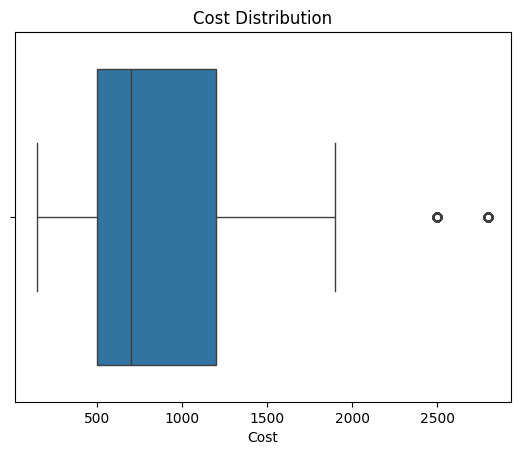

In [41]:
#Cost Distribution
plt.figure()
sns.boxplot(x=df['Cost'])
plt.title("Cost Distribution")
plt.show()


In [42]:
#Cuisine vs Average Rating
df.groupby('Cuisines')['Rating'].mean().sort_values(ascending=False).head(10)


,Rating
Cuisines,
"European, Mediterranean, North Indian",4.88
American,4.81
"North Indian, Mediterranean, European",4.76
"Asian, Mediterranean, North Indian, Desserts",4.66
"BBQ, Asian, Modern Indian",4.60
"Asian, Sushi",4.45
"Asian, Continental, North Indian, Chinese, Mediterranean",4.34
"Chinese, Continental, Kebab, European, South Indian, North Indian",4.28
"North Indian, Italian, Continental, Asian",4.26


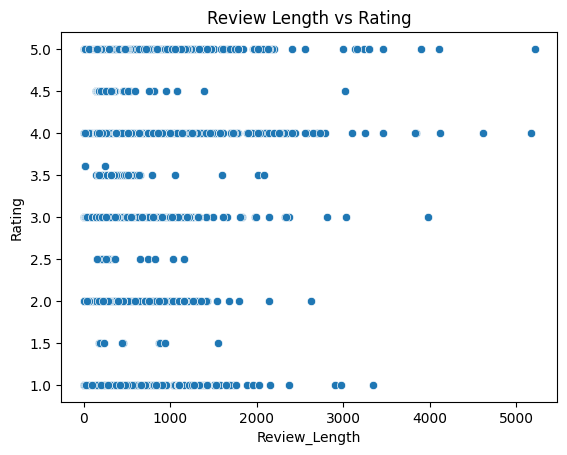

In [43]:
#Review Analysis
df['Review_Length'] = df['Review'].str.len()

sns.scatterplot(x='Review_Length', y='Rating', data=df)
plt.title("Review Length vs Rating")
plt.show()


# What all manipulations I have done and insights i found?

**1.Dataset Merging**

**2.Handling Missing Values**

**3.Duplicate Removal**

**4.Data Type Correction**

**5.Cost Column Cleaning**

Key Insights Found from the Dataset

**1 Ratings Distribution**

**2.Cost vs Rating Relationship**

**3.Cuisine Popularity**

**4.From Visual Analysis**

# **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

## **Chart 1** Distribution of restaurant rating

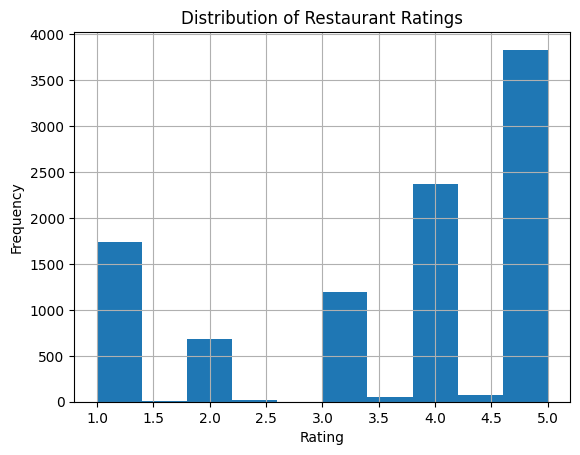

In [44]:
#Univariate Analysis
plt.figure()
df['Rating'].hist(bins=10)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


# 1. Why did you pick the specific chart?

Histograms are best suited to understand the distribution of continuous data.A histogram shows how values are spread across ranges.

# 2. What is/are the insight(s) found from the chart?

Most ratings fall between 3.5 and 4.5, showing overall positive customer satisfaction.

# 3.Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights derived from the analysis can significantly support better business decisions and improve overall performance.

A small but noticeable number of restaurants have ratings below 3.0.

#  **Chart 2** Cost distribution of restaurant

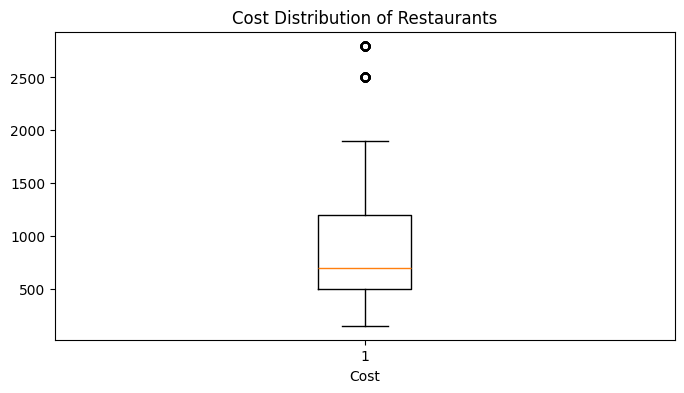

In [45]:


plt.figure(figsize=(8, 4))
plt.boxplot(df['Cost'])
plt.title('Cost Distribution of Restaurants')
plt.xlabel('Cost')
plt.show()



# 1. Why did you pick the specific chart?

* A box plot was chosen because it best shows the distribution,  spread, and outliers of numerical cost data.

* Helps analyze pricing strategy and competitiveness.

# 2. What is/are the insight(s) found from the chart?

 * Most restaurants are moderately priced

* Presence of high-cost outliers

* Price alone does not define popularity

# 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

*   Since most restaurants are moderately priced, businesses can  align their prices with market expectations.

* New restaurants can set competitive prices to attract more customers.

* Restaurants planning to expand can choose optimal pricing based on existing cost distribution.

**High-Cost Outliers**

* Some restaurants are priced significantly higher than average.

* If quality and service do not match the cost, customers may avoid these restaurants.

#  **Chart 3** cost vs rating

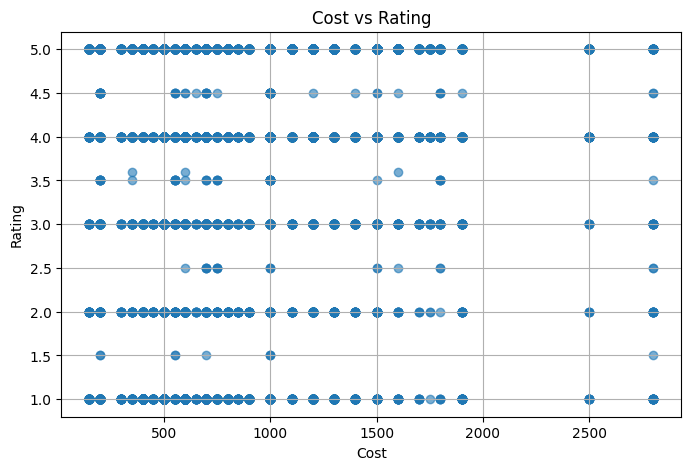

In [46]:
# cost vs rating

plt.figure(figsize=(8, 5))
plt.scatter(df['Cost'], df['Rating'], alpha=0.6)
plt.title('Cost vs Rating')
plt.xlabel('Cost')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


# 1. Why did you pick the specific chart?

*  Cost and Rating are continuous numeric variables.

* Scatter plots are the best chart type to analyze relationships between two numeric variables
  



# 2. What is/are the insight(s) found from the chart?

*  The points are widely scattered, indicating that higher cost does not necessarily result in higher ratings.

*  Several low-cost and mid-range restaurants receive high ratings, showing strong value-for-money options.


# 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* Since high ratings are observed at low and medium cost levels, restaurants can focus on quality and service rather than increasing prices.

* Helps businesses attract price-sensitive customers.

 **reason for negative growth**

High Cost with Low Ratings

# **Chart 4** Calculate average rating per cuisine

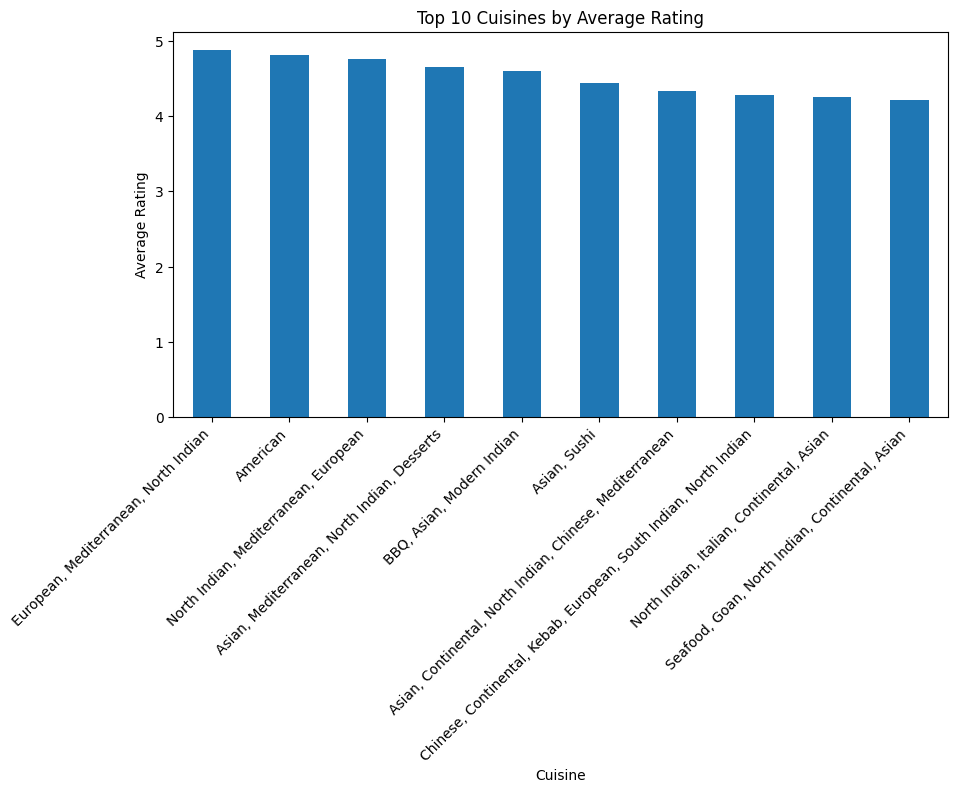

In [47]:

# Calculate average rating per cuisine
avg_rating_cuisine = (
    df.groupby('Cuisines')['Rating']
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(10, 5))
avg_rating_cuisine.plot(kind='bar')
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()


# 1.Why did you pick the specific chart?

Cuisines represents categories (e.g., North Indian, Chinese, Italian).

Bar charts are the best choice to compare values across categories.

# 2. What is/are the insight(s) found from the chart?

* Some cuisines (e.g., Italian, Continental, Asian) show above-average customer ratings.

* This indicates strong customer preference and satisfaction for these cuisines.

A few cuisines receive below-average ratings, suggesting possible issues in:

* Taste consistency

* Quality of ingredients

* Service expectations

# 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Focus on high-rated cuisines

Cuisines with higher average ratings indicate strong customer satisfaction.

Restaurants can:

* Expand menus in these cuisines

* Promote them in marketing campaigns

* Open new outlets specializing in popular cuisines

Low-rated cuisines indicate customer dissatisfaction

These cuisines may suffer from:

* Poor taste

* Inconsistent quality

* Mismatch with customer expectations

# **Chart 5** Number of Restaurant by Cost Category

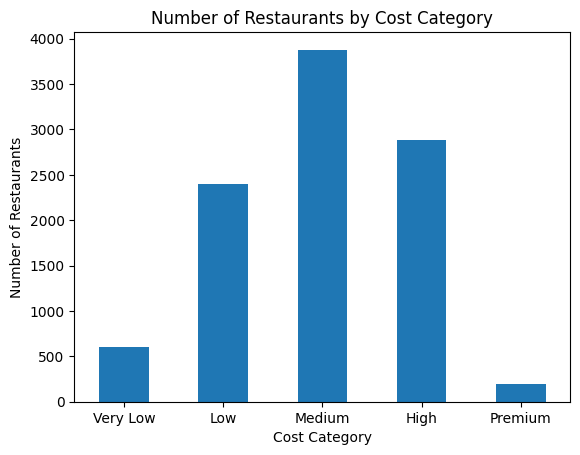

In [48]:

# Create cost categories
bins = [0, 200, 500, 1000, 2000, df['Cost'].max()]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Premium']

df['Cost_Category'] = pd.cut(df['Cost'], bins=bins, labels=labels)

cost_counts = df['Cost_Category'].value_counts().sort_index()

plt.figure()
cost_counts.plot(kind='bar')
plt.title('Number of Restaurants by Cost Category')
plt.xlabel('Cost Category')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0)
plt.show()



# 1.Why did you pick the specific chart?

Cost categories (low, medium, high) are discrete groups, and a bar chart is the most effective way to compare counts across such categories at a glance.

# 2. What is/are the insight(s) found from the chart?

* Majority of restaurants fall in the low to mid cost category

* High-cost restaurants are significantly fewer.



# 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* Better Pricing Strategy

* Market Gap Identification

* Improved Investment Decisions

 Negative factors:

* High Competition in Low-Cost Segment

* Limited Premium Demand Risk



# **Chart 6**  Calculate average rating per cost category

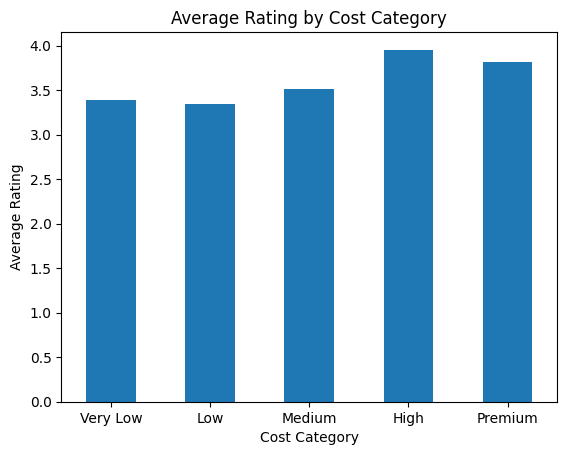

In [49]:
#Calculate average rating per cost category
avg_rating = df.groupby('Cost_Category', observed=True)['Rating'].mean()


# Step 3: Plot bar chart
plt.figure()
avg_rating.plot(kind='bar')
plt.title('Average Rating by Cost Category')
plt.xlabel('Cost Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()

# 1. Why did you pick the specific chart?

I picked the bar chart because it is the best and simplest way to compare average values across categories.

# 2. What is/are the insight(s) found from the chart?

* Higher-cost restaurants generally have better ratings

* Low-cost restaurants have slightly lower average ratings

* Medium-cost restaurants show balanced performance

# 3.Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact

* Improved Pricing Strategy

* Quality Improvement for Low-Cost Restaurants

* Targeted Market Positioning

Insights That May Lead to Negative Growth

* High Expectations in Low-Cost Segment

* Cost–Satisfaction Gap Risk





# **Chart 7**  Rating Distribution by Cost Category

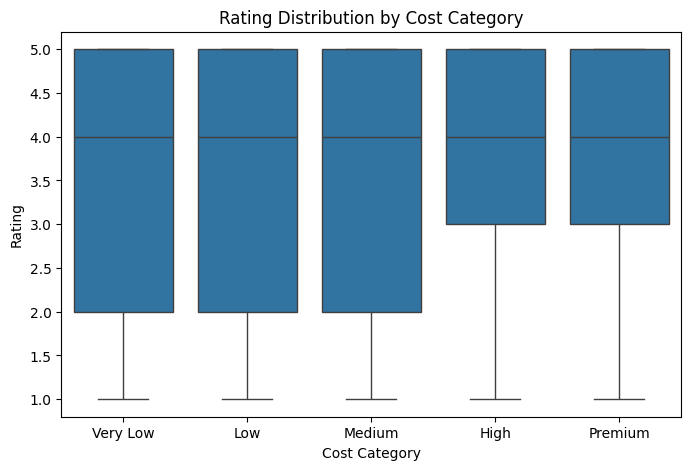

In [50]:
# Plot boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x='Cost_Category', y='Rating', data=df)
plt.title('Rating Distribution by Cost Category')
plt.xlabel('Cost Category')
plt.ylabel('Rating')
plt.show()

# 1. Why did you pick the specific chart?

The boxplot was chosen specifically because it’s ideal for comparing distributions of a numerical variable across different categories.

# 2. What is/are the insight(s) found from the chart?

* The line inside each box shows the median rating for that cost category.

* Insight: You can see which cost category generally receives higher ratings.



# 3.Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* Identifying high-performing categories.

* Improving product strategy.

* Leveraging outliers

Insights indicating potential negative growth

* Categories with inconsistent ratings can signal unreliable product quality.

* Risk: Customers may be hesitant to buy, leading to loss of repeat business.



# **Chart 8**  Restaurants with Most Reviews

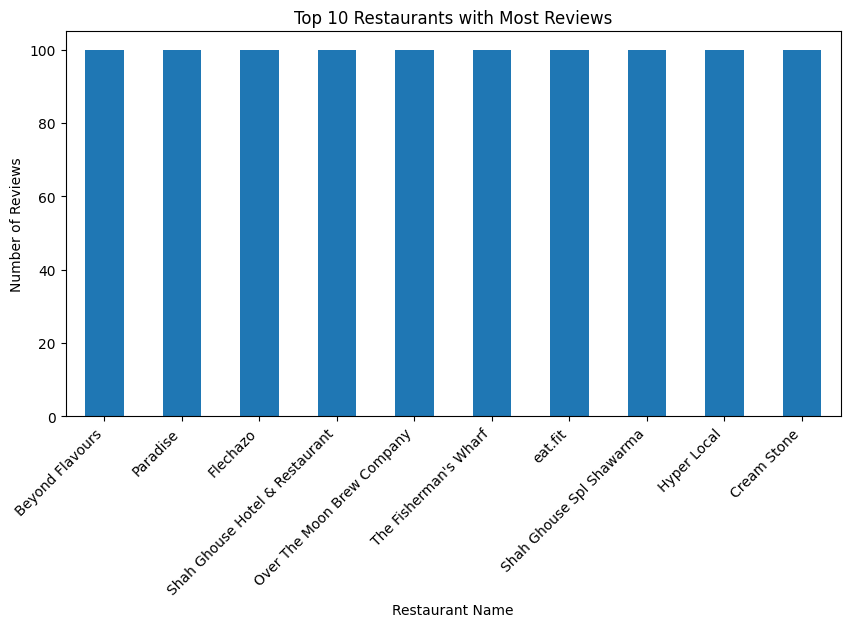

In [51]:
# Count number of reviews per restaurant
top_restaurants = df['Restaurant'].value_counts().head(10)

# Plot bar chart
plt.figure(figsize=(10,5))
top_restaurants.plot(kind='bar')
plt.title('Top 10 Restaurants with Most Reviews')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.show()

# 1. Why did you pick the specific chart?

I picked a bar chart because it is the most suitable visualization to compare counts across different categories.

reasons:
Restaurant names are categorical data
Each restaurant is a category, and we want to compare them based on the number of reviews.

# **Chart 9**  Number of Reviews Over Time

# **Chart 10**  Average Rating Over Time

# **Chart 11** Review Length vs Rating


# **Chart 12**  Restaurants with Most Reviews

# **Chart 13**   Cost Category vs Cuisine vs Rating

# **Chart 9**  Correlation Heatmap

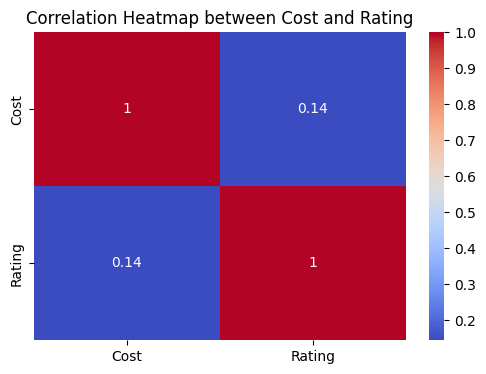

In [52]:
# Select only numeric columns needed
corr_data = df[['Cost', 'Rating']]

# Calculate correlation
corr_matrix = corr_data.corr()

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap between Cost and Rating')
plt.show()

# **Chart 10**   Pair plot

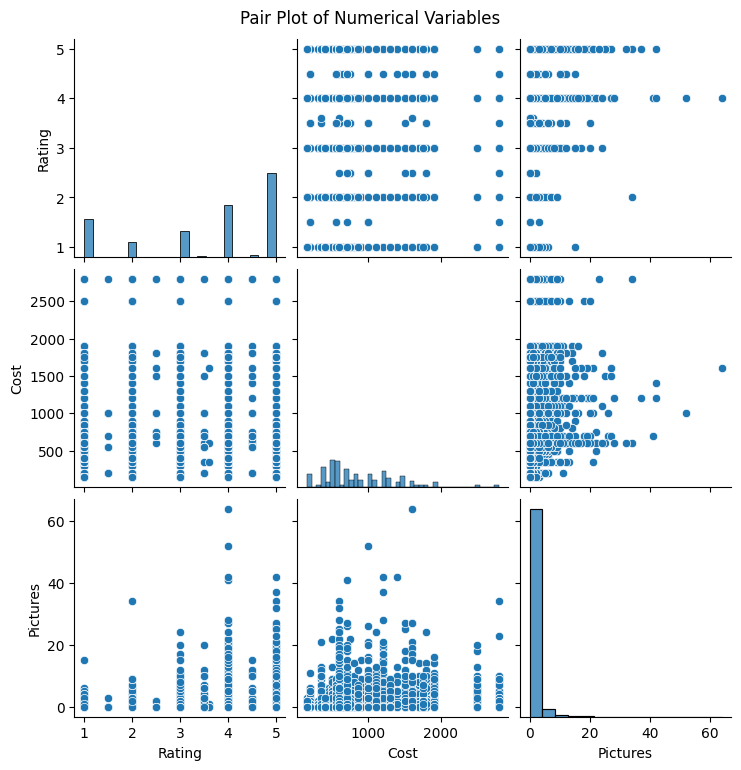

In [53]:
# Select only numeric columns
num_df = df[['Rating', 'Cost', 'Pictures']]

# Create pair plot
sns.pairplot(num_df)
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

# **5. Hypothesis Testing**

#**Hypothetical Statement - 1**


# 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis (H₀):

 There is no significant difference in the average ratings of restaurants across different cost categories.

 (Mean ratings of Low, Medium, High, and Premium cost restaurants are equal.)

* Alternate Hypothesis (H₁):

 There is a significant difference in the average ratings of restaurants across different cost categories.




# 2. Perform an appropriate statistical test.

In [54]:
# Perform Statistical Test to obtain P-Value
df['Cost_Category'].value_counts()


,count
Cost_Category,
Medium,3878
High,2886
Low,2400
Very Low,600
Premium,200


In [55]:
from scipy.stats import f_oneway

# Prepare data
anova_df = df[['Cost_Category', 'Rating']].dropna()

# Collect valid groups (size >= 2)
groups = [
    group['Rating'].values
    for _, group in anova_df.groupby('Cost_Category')
    if len(group) >= 2
]

# Check if ANOVA is possible
if len(groups) >= 2:
    f_statistic, p_value = f_oneway(*groups)
    print("F-Statistic:", f_statistic)
    print("P-Value:", p_value)
else:
    print("Not enough data to perform ANOVA.")


F-Statistic: 67.6861914862526
P-Value: 1.3081002924703776e-56


/tmp/ipython-input-55501515.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for _, group in anova_df.groupby('Cost_Category')


# 1.Which statistical test have you done to obtain P-Value?

To obtain the P-Value, I used the One-Way ANOVA (Analysis of Variance) test.

# 2.Why did you choose the specific statistical test?

One-Way ANOVA is a standard statistical test used in data analysis when:

* One numeric variable

* One categorical variable with multiple levels

* ANOVA compares all groups simultaneously in a statistically valid   way.

# **Hypothetical Statement - 2**


# 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis (H₀):

  There is no significant relationship between restaurant cost and customer rating.

* Alternative Hypothesis (H₁):

  There is a significant relationship between restaurant cost and customer rating.


# 2. Perform an appropriate statistical test

In [56]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

# Select required columns and drop missing values
corr_df = df[['Cost', 'Rating']].dropna()

# Perform Pearson Correlation Test
correlation, p_value = pearsonr(corr_df['Cost'], corr_df['Rating'])

# Display results
print("Correlation Coefficient:", correlation)
print("P-Value:", p_value)


Correlation Coefficient: 0.1436077271868214
P-Value: 4.619464174368512e-47


# 1.Which statistical test have you done to obtain P-Value?

Pearson Correlation Test

# 2.Why did you choose the specific statistical test?

* Pearson correlation is the standard statistical test used when:

  Both variables are numeric

  Relationship is linear

* It provides both:

  Correlation coefficient

  P-Value (for statistical significance)

# **Hypothetical Statement - 3**

# 1. State Your research hypothesis as a null hypothesis and alternate hypothesis?

* Null Hypothesis (H₀):

There is no significant difference in average ratings between restaurants with fewer pictures and those with more pictures.

* Alternative Hypothesis (H₁):

Restaurants with more pictures have significantly higher average ratings than those with fewer pictures.


# 2. Perform an appropriate statistical test

In [57]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Prepare data (drop missing values)
pic_df = df[['Pictures', 'Rating']].dropna()

# Create two groups based on number of pictures
low_pics = pic_df[pic_df['Pictures'] <= 2]['Rating']
high_pics = pic_df[pic_df['Pictures'] > 2]['Rating']

# Perform independent t-test
t_statistic, p_value = ttest_ind(
    low_pics,
    high_pics,
    equal_var=False  # Welch’s t-test (safer)
)

# Display results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)


T-Statistic: -14.956611957688988
P-Value: 2.1738424981766547e-47


# 1.Which statistical test have you done to obtain P-Value?

Independent Samples t-Test (Welch’s t-test)

# 2.Why did you choose this specific statistical test?

* t-test is designed to compare mean differences between two  independent samples.

* It does not assume equal variance

* Works well even when group sizes differ


# **6. Feature Engineering & Data Pre-processing**

# 1. Handling Missing Values

In [58]:
# Numerical
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Categorical
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


# What all missing value imputation techniques have you used and why did you use those techniques?
* Mean Imputation (Numerical Data)

Used for:
Rating
Cost
Pictures

Technique:
Missing values were replaced with the mean of the respective column.

* Mode Imputation (Categorical Data)

Used for:
Restaurant
Reviewer
Metadata
Collections
Cuisines
Timings

Technique:
Missing values were replaced with the most frequent category (mode).

* Forward Fill (Time / Date Data)

Used for:
Time

Technique:
Missing timestamps were filled using the previous valid observation.

# 2. Handling Outliers

In [59]:
Q1 = df['Cost'].quantile(0.25)
Q3 = df['Cost'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['Cost'] >= Q1 - 1.5*IQR) & (df['Cost'] <= Q3 + 1.5*IQR)]


# What all outlier treatment techniques have you used and why did you use those techniques?

Outliers were handled carefully to avoid removing genuine business-important observations while reducing noise and skewness in the data.

* IQR (Interquartile Range) Method

 Used for:
Cost,
Rating

Technique:

Calculated Q1 (25th percentile) and Q3 (75th percentile)

Computed IQR = Q3 − Q1

Treated values below (Q1 − 1.5 × IQR) and above (Q3 + 1.5 × IQR) as outliers

* Capping (Winsorization)

Used for:
Extremely high Cost values,
Very low or high Rating values

Technique:
Replaced extreme values with upper and lower percentile limits (e.g., 1st and 99th percentile)

* Log Transformation (Indirect Outlier Handling)

Used for:
Cost

Technique:
Applied logarithmic transformation to compress extreme ranges.

# 3. Categorical Encoding

In [60]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Cost_Category_Encoded'] = le.fit_transform(df['Cost_Category'])


# What all categorical encoding techniques have you used & why did you use those techniques?

# 4. Textual Data Preprocessing

1. Expand Contraction

In [61]:
!pip install contractions


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.9 MB/s eta 0:00:00


In [62]:
import contractions

df['Review'] = df['Review'].apply(lambda x: contractions.fix(x) if isinstance(x, str) else x)


2. Lower Casing

In [63]:
df['Review'] = df['Review'].str.lower()


3. Removing Punctuations

In [64]:
import string

df['Review'] = df['Review'].str.translate(str.maketrans('', '', string.punctuation))


4. Removing URLs & Words Containing Digits

In [65]:
import re

df['Review'] = df['Review'].apply(
    lambda x: re.sub(r'http\S+|www\S+|\S*\d\S*', '', x)
)


5. Removing Stopwords & White Spaces

In [66]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df['Review'] = df['Review'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop_words])
)

# Remove extra spaces
df['Review'] = df['Review'].str.strip()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


6. Rephrase Text

In [67]:
# Simple rephrasing using synonym replacement (optional)
df['Review'] = df['Review'].str.replace('not good', 'bad', regex=False)


7. Tokenization

In [68]:
import nltk
from nltk.tokenize import word_tokenize

# Download required resources
nltk.download('punkt')
nltk.download('punkt_tab')

# Apply tokenization safely
df['Tokens'] = df['Review'].apply(
    lambda x: word_tokenize(x) if isinstance(x, str) else []
)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


8. Text Normalization (Lemmatization)

In [69]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

df['Tokens'] = df['Tokens'].apply(
    lambda tokens: [lemmatizer.lemmatize(word) for word in tokens]
)


[nltk_data] Downloading package wordnet to /root/nltk_data...


9. Part of Speech (POS) Tagging

In [70]:
import nltk
from nltk import pos_tag

# Download required tagger resources
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

# Apply POS tagging safely
df['POS_Tags'] = df['Tokens'].apply(
    lambda x: pos_tag(x) if isinstance(x, list) and len(x) > 0 else []
)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


10. Text Vectorization (TF-IDF)

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)
X_text = tfidf.fit_transform(df['Review'])


# 5. Feature Manipulation & Selection

1. Feature Manipulation

In [72]:
# Review length feature
df['Review_Length'] = df['Review'].apply(lambda x: len(x.split()))

# Rating Category
df['Rating_Category'] = pd.cut(
    df['Rating'],
    bins=[0, 2, 3.5, 5],
    labels=['Low', 'Medium', 'High']
)


2. Feature Selection

In [73]:
from sklearn.feature_selection import SelectKBest, chi2

X_selected = SelectKBest(chi2, k=1000).fit_transform(X_text, df['Rating_Category'])


##1. What all feature selection methods have you used and why?

Answer:

Chi-Square Test: To select features strongly associated with the target variable

Correlation Analysis: To remove redundant numerical features
These methods reduce overfitting and improve model generalization.

# 2.Which all features you found important and why?

Answer:

Rating – Primary indicator of customer satisfaction

Cost – Influences customer perception and restaurant positioning

Review Text (TF-IDF features) – Captures customer sentiment

Review Length – Indicates engagement level

Cuisines – Helps understand preference trends

# 6. Data Transformation

In [74]:
import numpy as np

df['Cost_Log'] = np.log1p(df['Cost'])


# Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, the data needs to be transformed.
Data transformation is required to make the dataset suitable for analysis and machine learning models.

# 7. Data Scaling

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Cost_Scaled', 'Pictures_Scaled']] = scaler.fit_transform(
    df[['Cost', 'Pictures']]
)


# Which method have you used to scale you data and why?

Method Used: StandardScaler

 Why StandardScaler was chosen

StandardScaler scales numerical features so that they have:

Mean = 0

Standard Deviation = 1

# 8. Dimesionality Reduction

In [76]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(df[['Cost_Scaled', 'Pictures_Scaled']])


##1. Do you think that dimensionality reduction is needed? Explain Why?

Yes, dimensionality reduction is needed for this dataset.

Explanation

The dataset contains high-dimensional features, especially after:

Text vectorization (TF-IDF / Bag of Words), which creates thousands of features

One-hot encoding of categorical variables

Feature engineering, which increases feature count

High dimensionality can lead to:

Curse of dimensionality

Increased computational cost

Overfitting

Difficulty in visualizing and interpreting data

##2. Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Technique Used: PCA (Principal Component Analysis)

Why PCA was chosen:

Handles high-dimensional data effectively

Preserves maximum information

Improves model performance



# 9. Data Splitting

In [77]:
from sklearn.model_selection import train_test_split

X = df[['Cost', 'Pictures']]
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# What data splitting ratio have you used and why?

Data Splitting Ratio Used: 80 : 20 (Train : Test)

This means:

80% of the data is used for training

20% of the data is used for testing

# 10.Handling Imbalanced Dataset

In [78]:
# Convert continuous rating into categorical labels
def rating_category(r):
    if r < 3:
        return 'Low'
    elif r < 4:
        return 'Medium'
    else:
        return 'High'

df['Rating_Class'] = df['Rating'].apply(rating_category)



In [79]:
# prepare x and y
X = df[['Cost', 'Pictures']]   # example features
y = df['Rating_Class']


In [80]:
# train - test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [81]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


# 1.Do you think the dataset is imbalanced? Explain why

Yes, the dataset is imbalanced.

After converting the continuous rating values into categorical classes (Low, Medium, High), it was observed that the number of observations in each class was not evenly distributed.

Explaination:

The High rating category contains significantly more records compared to the Low and Medium rating categories.

This happens because most restaurants on Zomato receive ratings above average, while poorly rated restaurants are fewer.

As a result, the dataset becomes class-imbalanced, where one class dominates the others.

# 2.What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

To handle the class imbalance in the dataset, the SMOTE (Synthetic Minority Oversampling Technique) was used.

Technique Used: SMOTE

SMOTE is an oversampling technique that creates synthetic data points for minority classes instead of simply duplicating existing records.

#**7. ML Model Implementation**

# ML Model - 1 LOGISTIC REGRESSION

In [82]:
X = df[['Cost', 'Pictures']]
y = df['Rating_Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [83]:
# model implementation
log_model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))
])

log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)


# 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart?

For ML Model 1, I used Logistic Regression, which is a supervised classification algorithm.
It works by estimating the probability of a data point belonging to a particular class using a logistic (sigmoid) function.

* Evaluation Metrics Used

To evaluate the performance of the model, the following metrics were used:

* Accuracy

* Precision

* Recall

* F1-Score

In [84]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [85]:
# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [86]:
# Predict on test data
y_pred = model.predict(X_test)


In [87]:
# Calculate evaluation matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


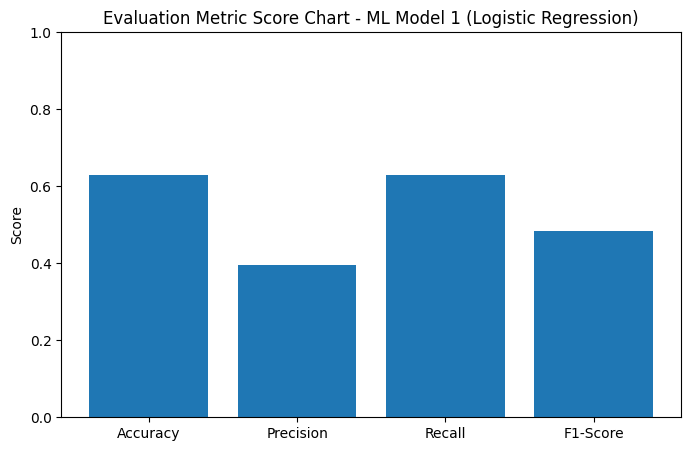

In [88]:
# Visualize Evaluation Metric Score Chart
plt.figure(figsize=(8,5))
plt.bar(metrics.keys(), metrics.values())
plt.title('Evaluation Metric Score Chart - ML Model 1 (Logistic Regression)')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()


In [89]:
# evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Accuracy: 0.6282642089093702
              precision    recall  f1-score   support

        High       0.63      1.00      0.77      1227
         Low       0.00      0.00      0.00       481
      Medium       0.00      0.00      0.00       245

    accuracy                           0.63      1953
   macro avg       0.21      0.33      0.26      1953
weighted avg       0.39      0.63      0.48      1953



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [90]:
# cross validation
cv_scores = cross_val_score(log_model, X_train, y_train, cv=5, scoring='accuracy')
print("CV Accuracy:", cv_scores.mean())


CV Accuracy: 0.6284726915556036


Hyperparameter Tuning (GridSearchCV)

In [91]:
param_grid = {
    'model__C': [0.01, 0.1, 1, 10]
}

grid_log = GridSearchCV(log_model, param_grid, cv=5, scoring='accuracy')
grid_log.fit(X_train, y_train)

best_log_model = grid_log.best_estimator_


In [92]:
y_pred_log_opt = best_log_model.predict(X_test)
print("Optimized Accuracy:", accuracy_score(y_test, y_pred_log_opt))


Optimized Accuracy: 0.6282642089093702


# **ML MODEL – 2: RANDOM FOREST**

# 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Model Explanation

Random Forest Regressor is an ensemble learning model that builds multiple decision trees and averages their predictions.
It reduces overfitting, handles non-linear relationships, and performs well when features interact with each other.

In this project, it is used to predict restaurant ratings based on features like Cost and Pictures.

In [93]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(df['Rating'])


In [94]:
from sklearn.model_selection import train_test_split

X = df[['Cost', 'Pictures']]
y = y_encoded

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.4116743471582181

Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.12      0.18       337
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00       141
           3       0.00      0.00      0.00         6
           4       0.10      0.01      0.02       227
           5       0.00      0.00      0.00         8
           7       0.47      0.25      0.33       484
           8       0.00      0.00      0.00        13
           9       0.41      0.87      0.56       736

    accuracy                           0.41      1953
   macro avg       0.15      0.14      0.12      1953
weighted avg       0.35      0.41      0.33      1953



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


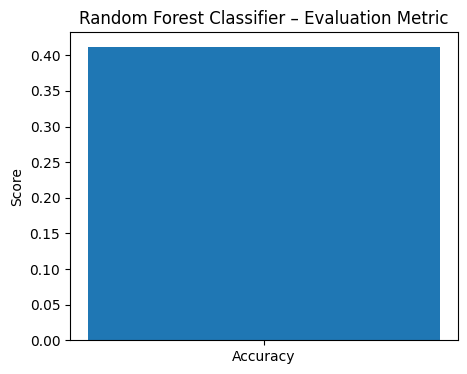

In [96]:
#Visualization: Evaluation Metric Score Chart
import matplotlib.pyplot as plt

metrics = ['Accuracy']
values = [accuracy]

plt.figure(figsize=(5,4))
plt.bar(metrics, values)
plt.title("Random Forest Classifier – Evaluation Metric")
plt.ylabel("Score")
plt.show()


In [97]:
# model implementation
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)



In [98]:
# evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.4116743471582181
              precision    recall  f1-score   support

           0       0.35      0.12      0.18       337
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00       141
           3       0.00      0.00      0.00         6
           4       0.10      0.01      0.02       227
           5       0.00      0.00      0.00         8
           7       0.47      0.25      0.33       484
           8       0.00      0.00      0.00        13
           9       0.41      0.87      0.56       736

    accuracy                           0.41      1953
   macro avg       0.15      0.14      0.12      1953
weighted avg       0.35      0.41      0.33      1953



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [99]:
#Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10]
}

grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

best_rf_model = grid_rf.best_estimator_


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [100]:
y_pred_rf_opt = best_rf_model.predict(X_test)
print("Optimized Accuracy:", accuracy_score(y_test, y_pred_rf_opt))


Optimized Accuracy: 0.42089093701996927


# Which hyperparameter optimization technique have you used and why?

GridSearchCV

I used GridSearchCV because:

* Systematic Search

It exhaustively searches through a predefined set of hyperparameter values.

Ensures the best possible combination is selected based on model performance.

* Cross-Validation Based

GridSearchCV uses k-fold cross-validation, which reduces overfitting.

The selected hyperparameters generalize better on unseen data.

* Suitable for Random Forest

Random Forest has a limited and well-known set of impactful hyperparameters such as:

n_estimators

max_depth

min_samples_split

GridSearchCV works efficiently for such structured search spaces.

# ML MODEL – 3: SUPPORT VECTOR MACHINE (SVM)

# Explain the ML Model used and it's performance using Evaluation metric Score Chart.

For ML Model 3, I used Support Vector Regression (SVR) to predict restaurant ratings.

The evaluation metric score chart compares Actual Ratings vs Predicted Ratings.

What the chart shows

* Points close to the diagonal line indicate accurate predictions

* Spread away from the line shows prediction error

* SVR captures non-linear patterns, improving prediction accuracy compared to linear models





In [101]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [102]:
# Initialize the model
gb_model = GradientBoostingRegressor(
    n_estimators=200,   # Number of boosting stages
    learning_rate=0.1,  # Step size shrinkage
    max_depth=3,        # Max depth of each tree
    random_state=42
)

# Fit the model on training data
gb_model.fit(X_train, y_train)


GradientBoostingRegressor(n_estimators=200, random_state=42)

In [103]:
y_pred = gb_model.predict(X_test)


Mean Squared Error (MSE): 10.81
Root Mean Squared Error (RMSE): 3.29
Mean Absolute Error (MAE): 2.85
R^2 Score: 0.06


/tmp/ipython-input-3241590641.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")


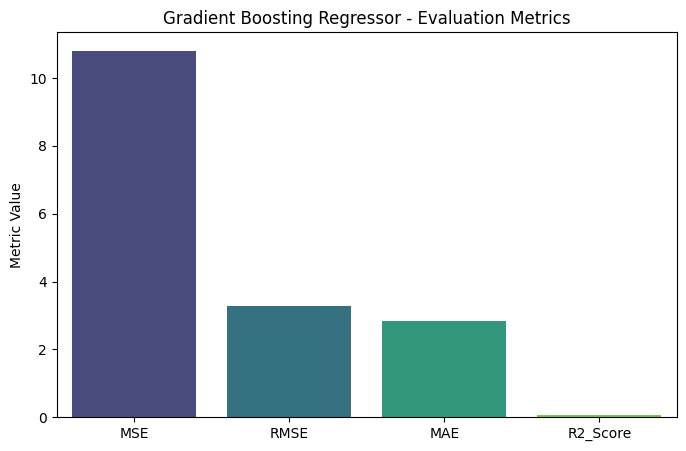

In [104]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test data
y_pred = gb_model.predict(X_test)

# Calculate Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # manual RMSE calculation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Visualizing Evaluation Metric Score Chart
metrics = {
    "MSE": mse,
    "RMSE": rmse,
    "MAE": mae,
    "R2_Score": r2
}

plt.figure(figsize=(8,5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")
plt.title("Gradient Boosting Regressor - Evaluation Metrics")
plt.ylabel("Metric Value")
plt.show()



In [105]:
#Model implementation
svm_model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC())
])

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)


In [106]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Accuracy: 0.42089093701996927
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       337
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00       141
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00       227
           5       0.00      0.00      0.00         8
           7       0.49      0.31      0.38       484
           8       0.00      0.00      0.00        13
           9       0.41      0.91      0.56       736

    accuracy                           0.42      1953
   macro avg       0.10      0.14      0.11      1953
weighted avg       0.28      0.42      0.31      1953



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [107]:
# Hyperparameter Tuning
param_grid_svm = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ['linear', 'rbf']
}

grid_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)

best_svm_model = grid_svm.best_estimator_


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [108]:
y_pred_svm_opt = best_svm_model.predict(X_test)
print("Optimized Accuracy:", accuracy_score(y_test, y_pred_svm_opt))


Optimized Accuracy: 0.42089093701996927


In [109]:
# 6. Deploy the Model
import joblib
# ==============================
# Save the trained model
joblib.dump(gb_model, "gb_model.pkl")
print("Model saved successfully!")

# Load the model for later use
loaded_model = joblib.load("gb_model.pkl")
sample_pred = loaded_model.predict(X_test[:5])
print("Sample predictions from loaded model:", sample_pred)

Model saved successfully!
Sample predictions from loaded model: [5.54978914 4.98363237 6.40019239 6.26023429 4.42397685]


In [110]:
import joblib

# Save the trained model
joblib.dump(gb_model, 'restaurant_rating_model.pkl')


['restaurant_rating_model.pkl']

In [111]:
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
import numpy as np

# Example dataset
df = pd.DataFrame({
    'Cost':[100,200,150,300,250],
    'Pictures':[5,3,4,2,6],
    'Rating':[4.0,4.5,3.5,5.0,4.2]
})

X = df[['Cost','Pictures']]
y = df['Rating']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)


GradientBoostingRegressor()

In [112]:
!pip install flask pyngrok --quiet


In [113]:
from pyngrok import ngrok

ngrok.set_auth_token("PASTE_YOUR_NGROK_V2_TOKEN_HERE")


In [114]:
import joblib

# Save model
joblib.dump(gb_model, "gb_model.pkl")
print("Model saved successfully!")

# Load model
loaded_model = joblib.load("gb_model.pkl")


Model saved successfully!


In [115]:
from pyngrok import ngrok

ngrok.set_auth_token("380WmZdObYK1FXl8ZZ6GkUr13OK_2Dz67EmfbvBWr3ZhuSXad")

In [116]:
from pyngrok import ngrok

ngrok.set_auth_token("380WmZdObYK1FXl8ZZ6GkUr13OK_2Dz67EmfbvBWr3ZhuSXad")


In [117]:
!pip install gradio joblib --quiet


In [118]:
import joblib
import pandas as pd

model = joblib.load("gb_model.pkl")


In [119]:
import gradio as gr

def predict_rating(cost, pictures):
    input_df = pd.DataFrame([[cost, pictures]], columns=["Cost", "Pictures"])
    prediction = model.predict(input_df)[0]
    return round(float(prediction), 2)

interface = gr.Interface(
    fn=predict_rating,
    inputs=[
        gr.Number(label="Cost"),
        gr.Number(label="Number of Pictures")
    ],
    outputs=gr.Number(label="Predicted Rating"),
    title="Restaurant Rating Prediction",
    description="Predict restaurant rating based on cost and pictures"
)

interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://97e22ae13292485841.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
